In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Lammentisation
# Stemming
# Stopwords removal

from https://stats.stackexchange.com/questions/304217/how-is-the-similarity-method-in-spacy-computed
- Spacy uses Glove in the background. Then word2vec

- **SpaCy already has the incredibly simple .vector, which computes the w2v vector as trained from the GloVe model**
- By default it's **cosine similarity**, with vectors averaged over the document for missing words.

In [3]:
!python -m spacy download en_core_web_md --quiet

     |████████████████████████████████| 96.4 MB 1.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


from https://spacy.io/usage/linguistic-features#vectors-similarity
- Similarity is determined by comparing word vectors or “word embeddings”, multi-dimensional meaning representations of a word. Word vectors can be generated using an algorithm like word2vec and usually look like this: Just a matrix

In [4]:
import spacy
# nlp = spacy.load("en_core_web_lg")
nlp = spacy.load('en_core_web_md') # use medium model
######### RESTART RUNTIME AFTER FIRST RUN

**Using the simiarity attribute**

In [5]:
doc1 = nlp(u'the person wear red T-shirt. He likes to walk and is always playful in nature ')
doc2 = nlp(u'this person is walking. That same person is one of the most joyful people I have met')
doc1.similarity(doc2)

0.8977779112576395

## *SCORE IS 0.89777*

**Using the vector attribute**

In [6]:
np.size(doc1.vector), doc1.vector[:10]

(300, array([ 0.03568406,  0.14651284, -0.14489225, -0.06196288,  0.09980166,
         0.08404781,  0.01476733, -0.11692534, -0.07191351,  2.1163518 ],
       dtype=float32))

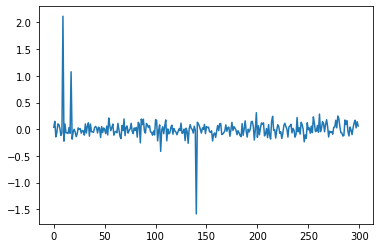

In [7]:
plt.plot(doc1.vector)

Plotting clearly shows how some elements in the vector have a greater magnitude. This should most likely correspond to the terms *red, walk, playful* (I guess)

In [8]:
df = pd.DataFrame({'Text': [], 'Has Vector':[], 'Vector Norm': [], 'Is out of Vecab':[]})

In [9]:
for token in doc1:
    df2 = {'Text': token.text, 'Has Vector': token.has_vector, 
           'Vector Norm': token.vector_norm, 'Is out of Vecab' : token.is_oov}
    df = df.append(df2, ignore_index = True)

In [10]:
df

,Text,Has Vector,Vector Norm,Is out of Vecab
0,the,1.0,4.709350,0.0
1,person,True,6.158658,False
2,wear,True,7.019624,False
3,red,True,6.283091,False
4,T,True,6.070901,False
5,-,True,5.603344,False
6,shirt,True,6.752304,False
7,.,True,4.931635,False
8,He,True,6.080851,False
9,likes,True,6.536640,False


In [11]:
word_try = nlp(u'wear')
np.linalg.norm(word_try.vector)
# answer matches with what is given

7.0196238

# use the csv file

In [12]:
data = pd.read_csv('/content/answers.csv')
data.head()

,answer,correct,question,reference_answer,id
0,You could tell if it has the hardest if most o...,0,"Carrie wanted to find out which was harder, a ...",The harder coin will scratch the other.,0
1,If just the penny could scratch and the nickel...,1,"Carrie wanted to find out which was harder, a ...",The harder coin will scratch the other.,0
2,Whichever one was damaged most was less hard.,1,"Carrie wanted to find out which was harder, a ...",The harder coin will scratch the other.,0
3,Rub them against a crystal.,0,"Carrie wanted to find out which was harder, a ...",The harder coin will scratch the other.,0
4,Which had less scratches.,1,"Carrie wanted to find out which was harder, a ...",The harder coin will scratch the other.,0


In [13]:
data.shape

(140, 5)

In [14]:
data['reference_answer'].value_counts()

The harder coin will scratch the other.                               36
A solution is a mixture formed when a solid dissolves in a liquid.    36
When the string was tighter, the pitch was higher.                    36
Like poles repel and opposite poles attract.                          32
Name: reference_answer, dtype: int64

In [18]:
our_score = []
for ans, ref_ans in zip(data['answer'], data['reference_answer']):
    # print(ans, ref_ans)
    doc1 = nlp(ans) 
    doc2 = nlp(ref_ans)
    our_score.append(doc1.similarity(doc2))
    # break

In [19]:
data['our_scores'] = our_score
data.head()

,answer,correct,question,reference_answer,id,our_scores
0,You could tell if it has the hardest if most o...,0,"Carrie wanted to find out which was harder, a ...",The harder coin will scratch the other.,0,0.891488
1,If just the penny could scratch and the nickel...,1,"Carrie wanted to find out which was harder, a ...",The harder coin will scratch the other.,0,0.940298
2,Whichever one was damaged most was less hard.,1,"Carrie wanted to find out which was harder, a ...",The harder coin will scratch the other.,0,0.832927
3,Rub them against a crystal.,0,"Carrie wanted to find out which was harder, a ...",The harder coin will scratch the other.,0,0.832163
4,Which had less scratches.,1,"Carrie wanted to find out which was harder, a ...",The harder coin will scratch the other.,0,0.796470


In [20]:
data[['correct', 'our_scores']]

,correct,our_scores
0,0,0.891488
1,1,0.940298
2,1,0.832927
3,0,0.832163
4,1,0.796470
...,...,...
135,1,0.932995
136,1,0.910652
137,1,0.906521
138,0,0.946161


#### This **does not give good results** because even the wrong answers use correct terms. This makes the model believe that the two are similar

# Use the other many_answers file
we need to preprocess a bit

In [55]:
data = pd.read_csv('/content/many_answers.csv')
data.head()

,type,ans1,ans2,ans3,ans4,ans5
0,ER model,ER model stands for an Entity-Relationship mod...,An Entity–relationship model (ER model) descri...,The ER model defines the conceptual view of a ...,An Entity Relationship (ER) Diagram is a type ...,ER-modeling is a data modeling technique used ...
1,normalization,Database normalization is used in a database m...,Normalization is the process of organizing the...,Database Normalization is a technique of organ...,Normalization is a database design technique w...,Normalization is the process of efficiently or...
2,advantage dbms,"It has decreased the risk of data management, ...",1. Improved data sharing:\nThe DBMS helps crea...,1. Data Redundancy\nUnlike traditional file-sy...,1. Improved data sharing\n \nAn advantage of t...,1.Minimize Data Redundancy \nIn File Processin...
3,RDBMS,RDBMS stands for Relational Database Managemen...,A relational database management system (RDBMS...,RDBMS stands for relational database managemen...,RDBMS full form is for Relational Database Man...,A relational database is a type of database. I...
4,Dbms Architecture,The design of a DBMS depends on its architectu...,The DBMS design depends upon its architecture....,The architecture of DBMS depends on the comput...,"DBMS architecture helps in design, development...",A Database Management system is not always dir...


In [56]:
# assuming that ans1 is the model answer, we calculate similarity with other columns' answers

In [57]:
data.isnull().sum()

type    0
ans1    0
ans2    1
ans3    2
ans4    3
ans5    3
dtype: int64

In [58]:
data[data['ans2'].isna()]

,type,ans1,ans2,ans3,ans4,ans5
22,hierarchichal db,It is the type of database that stores data in...,NaN,In a hierarchical database management system (...,Hierarchical databases were the next evolution...,A hierarchical database model is a data model ...


In [59]:
data = data.dropna()
data.isnull().sum()

type    0
ans1    0
ans2    0
ans3    0
ans4    0
ans5    0
dtype: int64

In [60]:
# Puncuation and stopwords removal
import string #library that contains punctuation
# string.punctuation

def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation]).lower()
    # punctuationfree = punctuationfree.apply(lambda x: x.lower())
    return punctuationfree

#storing the puntuation free text
data['clean_ans1']= data['ans1'].apply(lambda x:remove_punctuation(x))
data['clean_ans2']= data['ans2'].apply(lambda x:remove_punctuation(x))

In [61]:
data[['clean_ans1', 'clean_ans2']]

,clean_ans1,clean_ans2
0,er model stands for an entityrelationship mode...,an entity–relationship model er model describe...
1,database normalization is used in a database m...,normalization is the process of organizing the...
2,it has decreased the risk of data management i...,1 improved data sharing\nthe dbms helps create...
3,rdbms stands for relational database managemen...,a relational database management system rdbms ...
4,the design of a dbms depends on its architectu...,the dbms design depends upon its architecture ...
5,in 1tier architecture the dbms is the only ent...,in this architecture the database is directly ...
6,if the architecture of dbms is 2tier then it m...,the 2tier architecture is same as basic client...
7,a 3tier architecture separates its tiers from ...,the 3tier architecture contains another layer ...
8,this property states that a transaction must b...,it states that all operations of the transacti...
9,the database must remain in a consistent state...,the integrity constraints are maintained so th...


In [53]:
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# stopwords = stopwords.words('english')

# def remove_stopwords(text):
#     output= [i for i in text.split(' ') if i not in stopwords]
#     return output

# #applying the function
# data['clean_ans1'] = data['clean_ans1'].apply(remove_stopwords)
# data['clean_ans2'] = data['clean_ans2'].apply(lambda x: " ".join(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
data[['clean_ans1', 'clean_ans2']]

,clean_ans1,clean_ans2
0,er model stands for an entityrelationship mode...,an entity–relationship model er model describe...
1,database normalization is used in a database m...,normalization is the process of organizing the...
2,it has decreased the risk of data management i...,1 improved data sharing\nthe dbms helps create...
3,rdbms stands for relational database managemen...,a relational database management system rdbms ...
4,the design of a dbms depends on its architectu...,the dbms design depends upon its architecture ...
5,in 1tier architecture the dbms is the only ent...,in this architecture the database is directly ...
6,if the architecture of dbms is 2tier then it m...,the 2tier architecture is same as basic client...
7,a 3tier architecture separates its tiers from ...,the 3tier architecture contains another layer ...
8,this property states that a transaction must b...,it states that all operations of the transacti...
9,the database must remain in a consistent state...,the integrity constraints are maintained so th...


In [63]:
import nltk
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

data['clean_ans1'] = data.clean_ans1.apply(lemmatize_text)
data['clean_ans2'] = data.clean_ans2.apply(lemmatize_text)

data['clean_ans1'] = data['clean_ans1'].apply(lambda x: " ".join(x))
data['clean_ans2'] = data['clean_ans2'].apply(lambda x: " ".join(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [64]:
data[['clean_ans1', 'clean_ans2']]

,clean_ans1,clean_ans2
0,"[er, model, stand, for, an, entityrelationship...","[an, entity–relationship, model, er, model, de..."
1,"[database, normalization, is, used, in, a, dat...","[normalization, is, the, process, of, organizi..."
2,"[it, ha, decreased, the, risk, of, data, manag...","[1, improved, data, sharing, the, dbms, help, ..."
3,"[rdbms, stand, for, relational, database, mana...","[a, relational, database, management, system, ..."
4,"[the, design, of, a, dbms, depends, on, it, ar...","[the, dbms, design, depends, upon, it, archite..."
5,"[in, 1tier, architecture, the, dbms, is, the, ...","[in, this, architecture, the, database, is, di..."
6,"[if, the, architecture, of, dbms, is, 2tier, t...","[the, 2tier, architecture, is, same, a, basic,..."
7,"[a, 3tier, architecture, separate, it, tier, f...","[the, 3tier, architecture, contains, another, ..."
8,"[this, property, state, that, a, transaction, ...","[it, state, that, all, operation, of, the, tra..."
9,"[the, database, must, remain, in, a, consisten...","[the, integrity, constraint, are, maintained, ..."


In [66]:
data[['clean_ans1', 'clean_ans2']]

,clean_ans1,clean_ans2
0,er model stand for an entityrelationship model...,an entity–relationship model er model describe...
1,database normalization is used in a database m...,normalization is the process of organizing the...
2,it ha decreased the risk of data management ie...,1 improved data sharing the dbms help create a...
3,rdbms stand for relational database management...,a relational database management system rdbms ...
4,the design of a dbms depends on it architectur...,the dbms design depends upon it architecture t...
5,in 1tier architecture the dbms is the only ent...,in this architecture the database is directly ...
6,if the architecture of dbms is 2tier then it m...,the 2tier architecture is same a basic clients...
7,a 3tier architecture separate it tier from eac...,the 3tier architecture contains another layer ...
8,this property state that a transaction must be...,it state that all operation of the transaction...
9,the database must remain in a consistent state...,the integrity constraint are maintained so tha...


In [67]:
our_score_col1_2 = []
for ans, ref_ans in zip(data['clean_ans2'], data['clean_ans1']):
    # print(ans, ref_ans)
    doc1 = nlp(ans) 
    doc2 = nlp(ref_ans)
    our_score_col1_2.append(doc1.similarity(doc2))
    # break

data['cleaned_our_scores_col1_2'] = our_score_col1_2
data.head()

,type,ans1,ans2,ans3,ans4,ans5,clean_ans1,clean_ans2,cleaned_our_scores_col1_2
0,ER model,ER model stands for an Entity-Relationship mod...,An Entity–relationship model (ER model) descri...,The ER model defines the conceptual view of a ...,An Entity Relationship (ER) Diagram is a type ...,ER-modeling is a data modeling technique used ...,er model stand for an entityrelationship model...,an entity–relationship model er model describe...,0.970913
1,normalization,Database normalization is used in a database m...,Normalization is the process of organizing the...,Database Normalization is a technique of organ...,Normalization is a database design technique w...,Normalization is the process of efficiently or...,database normalization is used in a database m...,normalization is the process of organizing the...,0.971804
2,advantage dbms,"It has decreased the risk of data management, ...",1. Improved data sharing:\nThe DBMS helps crea...,1. Data Redundancy\nUnlike traditional file-sy...,1. Improved data sharing\n \nAn advantage of t...,1.Minimize Data Redundancy \nIn File Processin...,it ha decreased the risk of data management ie...,1 improved data sharing the dbms help create a...,0.964864
3,RDBMS,RDBMS stands for Relational Database Managemen...,A relational database management system (RDBMS...,RDBMS stands for relational database managemen...,RDBMS full form is for Relational Database Man...,A relational database is a type of database. I...,rdbms stand for relational database management...,a relational database management system rdbms ...,0.907578
4,Dbms Architecture,The design of a DBMS depends on its architectu...,The DBMS design depends upon its architecture....,The architecture of DBMS depends on the comput...,"DBMS architecture helps in design, development...",A Database Management system is not always dir...,the design of a dbms depends on it architectur...,the dbms design depends upon it architecture t...,0.951483


In [ ]:
!pip install -U sentence-transformers --quiet
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

In [98]:
from sentence_transformers import util
transformer_scores = []
# looping is not best wrt time taken, but will do the work
for i,j in zip(data['clean_ans1'], data['clean_ans2']):
    # print(i,j)
    lst = []
    lst.append(i)
    lst.append(j)
    # print(lst)
    sentence_embeddings = model.encode(lst)
    scores = float(util.pytorch_cos_sim(sentence_embeddings[0], sentence_embeddings[1]))
    transformer_scores.append(scores)
    # break

In [99]:
data['transformers_our_scores_col1_2'] = transformer_scores
data.head()

,type,ans1,ans2,ans3,ans4,ans5,clean_ans1,clean_ans2,cleaned_our_scores_col1_2,transformers_our_scores_col1_2
0,ER model,ER model stands for an Entity-Relationship mod...,An Entity–relationship model (ER model) descri...,The ER model defines the conceptual view of a ...,An Entity Relationship (ER) Diagram is a type ...,ER-modeling is a data modeling technique used ...,er model stand for an entityrelationship model...,an entity–relationship model er model describe...,0.970913,0.789289
1,normalization,Database normalization is used in a database m...,Normalization is the process of organizing the...,Database Normalization is a technique of organ...,Normalization is a database design technique w...,Normalization is the process of efficiently or...,database normalization is used in a database m...,normalization is the process of organizing the...,0.971804,0.741483
2,advantage dbms,"It has decreased the risk of data management, ...",1. Improved data sharing:\nThe DBMS helps crea...,1. Data Redundancy\nUnlike traditional file-sy...,1. Improved data sharing\n \nAn advantage of t...,1.Minimize Data Redundancy \nIn File Processin...,it ha decreased the risk of data management ie...,1 improved data sharing the dbms help create a...,0.964864,0.597942
3,RDBMS,RDBMS stands for Relational Database Managemen...,A relational database management system (RDBMS...,RDBMS stands for relational database managemen...,RDBMS full form is for Relational Database Man...,A relational database is a type of database. I...,rdbms stand for relational database management...,a relational database management system rdbms ...,0.907578,0.570266
4,Dbms Architecture,The design of a DBMS depends on its architectu...,The DBMS design depends upon its architecture....,The architecture of DBMS depends on the comput...,"DBMS architecture helps in design, development...",A Database Management system is not always dir...,the design of a dbms depends on it architectur...,the dbms design depends upon it architecture t...,0.951483,0.683388
